In [1]:
#here we are analysing Credit Card dataset (creditcard.csv) to detect fraudulent transaction and genuine transaction

In [2]:
#importing basic library 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#laoding the dataset 
df=pd.read_csv("creditcard.csv")

In [4]:
#first look of dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#number of rows and column in dataset 
df.shape

(284807, 31)

In [6]:
#data types of each column
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
#checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#here thier is no null values in dataset 
#as we see thier are all numerical values in data set which matches with the datatypes 
#now visualizing null values 

<AxesSubplot:>

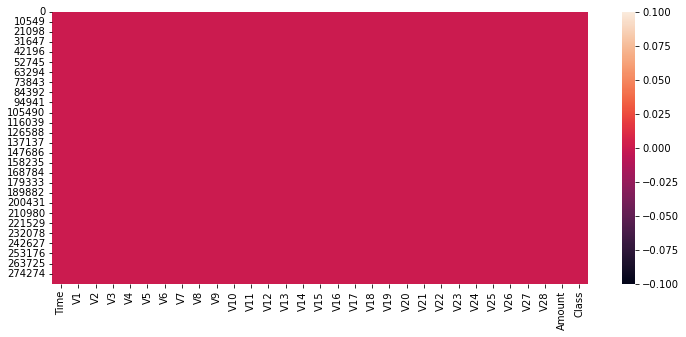

In [9]:
plt.figure(figsize=(12,5))
sb.heatmap(df.isnull())

In [10]:
#detail information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe().round(2).style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.860000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,88.350000,0.000000
std,47488.150000,1.960000,1.650000,1.520000,1.420000,1.380000,1.330000,1.240000,1.190000,1.100000,1.090000,1.020000,1.000000,1.000000,0.960000,0.920000,0.880000,0.850000,0.840000,0.810000,0.770000,0.730000,0.730000,0.620000,0.610000,0.520000,0.480000,0.400000,0.330000,250.120000,0.040000
min,0.000000,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-22.570000,-15.430000,0.000000,0.000000
25%,54201.500000,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-0.070000,-0.050000,5.600000,0.000000
50%,84692.000000,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,-0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000,0.010000,22.000000,0.000000
75%,139320.500000,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,0.090000,0.080000,77.160000,0.000000
max,172792.000000,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,7.130000,10.530000,8.880000,17.320000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,31.610000,33.850000,25691.160000,1.000000


In [12]:
#checking for duplicated values
df.duplicated().sum()

1081

In [13]:
#seems thier are 1081 duplicate values in dataset, therefore will remove values to avoid misleading information 
df=df.drop_duplicates()

In [14]:
#again checking for duplicate
df.duplicated().sum()

0

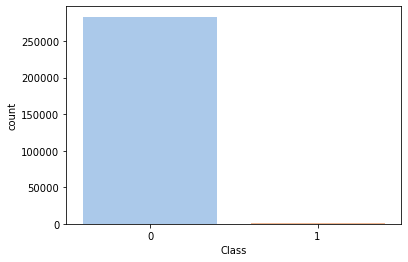

In [15]:
#checking class column values 
sb.countplot(data=df,x='Class',palette='pastel')
plt.show()

<AxesSubplot:>

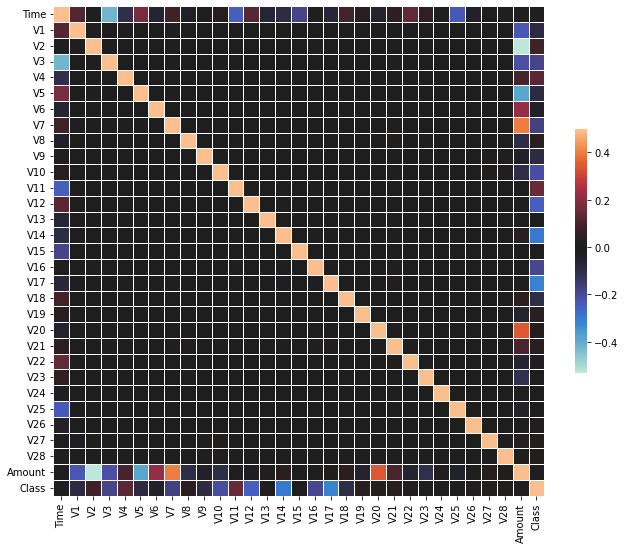

In [16]:
#checing correlation of input and output 
plt.subplots(figsize=(11,9))
sb.heatmap(df.corr(),vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
#looking at above heatmap The top 3 independent variables {V17, V14, V12} ,
#that should contains important information about whether a giving credit card transaction is fraudulent or not

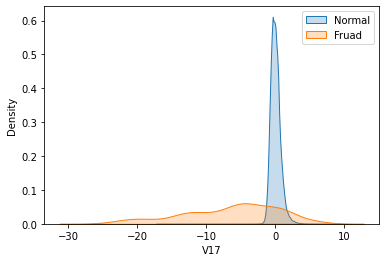

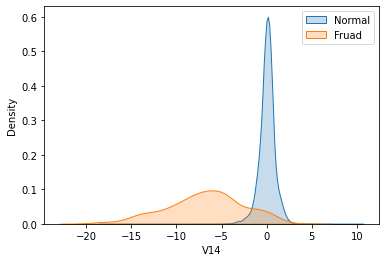

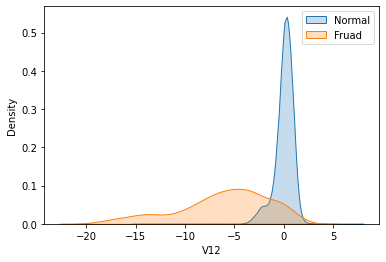

In [18]:
var=['V17','V14','V12']
for i in var:
    sb.kdeplot(data=df[df['Class']==0][i], label='Normal',shade=True)
    sb.kdeplot(data=df[df['Class']==1][i], label='Fruad',shade=True)
    plt.legend()
    plt.show()
    

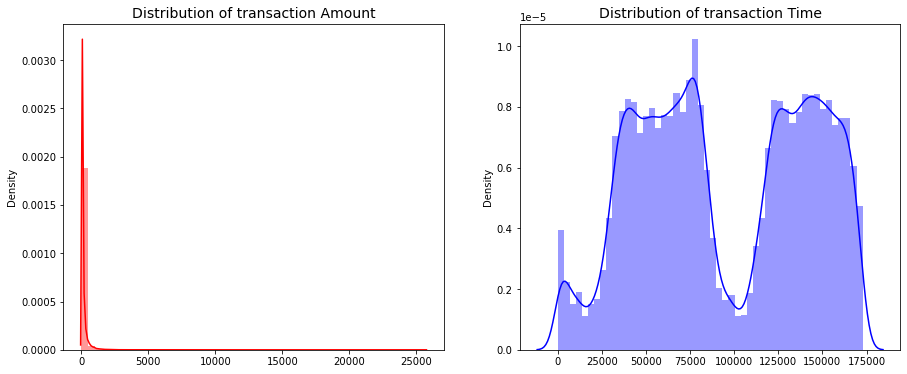

In [19]:
#Deeper look into time and amount
f, ax = plt.subplots(1,2,figsize=(15,6))
sb.distplot(df['Amount'].values,ax=ax[0],color='r')
sb.distplot(df['Time'].values,ax=ax[1],color='b')
ax[0].set_title("Distribution of transaction Amount",fontsize=14)
ax[1].set_title("Distribution of transaction Time",fontsize=14)
plt.show()


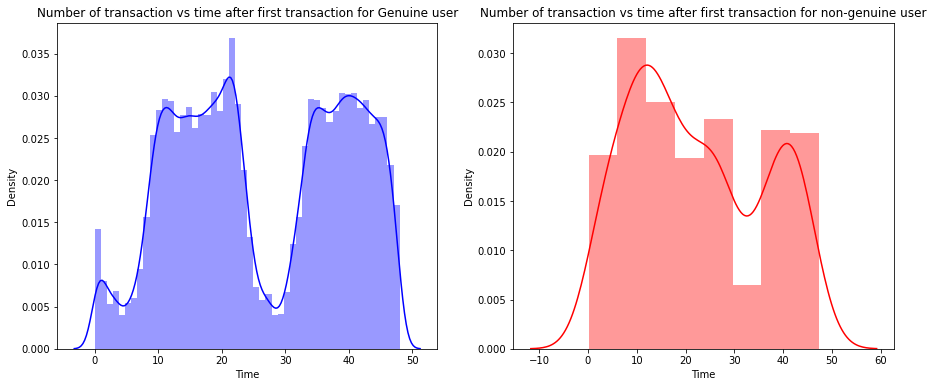

In [20]:
#transaction time for ganuine user vs transaction time of fraudlent user 
f,ax=plt.subplots(1,2,figsize=(15,6))
nofraud=df[df['Class']==0]
fraud=df[df['Class']==1]
sb.distplot(nofraud['Time']/60/60,ax=ax[0],color='b')
sb.distplot(fraud['Time']/60/60,ax=ax[1],color='r')
ax[0].set_title("Number of transaction vs time after first transaction for Genuine user")
ax[1].set_title("Number of transaction vs time after first transaction for non-genuine user")
plt.show()

<AxesSubplot:xlabel='Amount'>

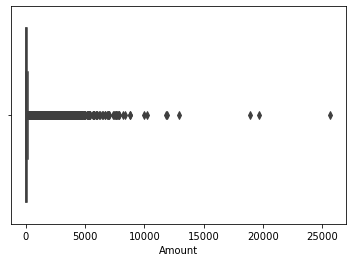

In [21]:
#checking outlier in amount column 
sb.boxplot(df.Amount)

In [22]:
#here there is outlier in data, but as we have few record of fraudulent user we will not remove outlier
#but yes we can remove extreme outlier

In [23]:
#data scaling 
#here amount column dont have same scale value with other feature 
#we will apply standard scaler on amount column 
from sklearn.preprocessing import StandardScaler


In [24]:
#creating object of standardscaler class
ss=StandardScaler()


In [25]:
df['Amount']=ss.fit_transform(df['Amount'].values.reshape(-1,1))

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [27]:
#selecting input and output 
X=df.drop("Class",axis=1)
Y=df['Class']

In [28]:
#here we have very unbalanced data 
#balancing the data 
#to use imblearn module 1st install it 
#!pip install imblearn


In [30]:
#!pip install sklearn

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
#CREATING object of smote
smt = SMOTE(random_state=42)

In [34]:
X_resampled,Y_resampeld = smt.fit_resample(X,Y)

In [36]:
X_resampled.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
41610,40825.000000,1.156738,-0.181899,0.030421,0.182702,-0.559384,-1.044591,0.102148,-0.099781,0.288172,...,-0.167801,-0.031826,-0.241735,0.026237,0.426945,0.223739,1.020533,-0.106855,-0.000801,-0.153845
223865,143921.000000,1.882045,-0.499051,-1.494708,0.313994,-0.231542,-1.276645,0.275833,-0.371519,0.552662,...,-0.036824,0.256046,0.568700,-0.056026,-0.054202,0.004272,0.785494,-0.117107,-0.054626,0.105461
248742,154518.000000,-1.264106,0.855546,1.747340,-0.416281,-0.460319,-0.192709,0.024039,0.598917,-0.173395,...,-0.209332,-0.083144,-0.383693,-0.038985,0.020062,0.287501,-0.442884,-0.162954,-0.022703,-0.276689
229363,146237.000000,0.805539,0.628408,-2.481305,-0.176980,0.841448,-0.774148,0.984896,-2.146519,-0.217337,...,-0.605579,1.988898,0.967783,-0.359878,-0.391906,-0.159512,-0.029944,0.446224,0.381845,0.153864
534208,100448.362407,-22.736496,15.815168,-22.707815,7.653853,-14.674884,0.271728,-29.421906,-16.277690,-9.808379,...,4.509440,-9.952212,4.546857,1.734140,0.414173,-0.046678,-0.591216,-4.439236,-0.435844,-0.349333
4753,4253.000000,-0.231105,1.421676,1.820595,2.930910,0.304631,0.508886,0.281243,0.148131,-0.430039,...,0.249652,-0.060079,0.221684,0.032017,0.170169,-0.481504,0.078544,0.331048,0.125359,-0.313391
312534,146126.582874,0.258286,3.783047,-6.242230,6.858230,0.414421,-2.555589,-1.850352,0.632788,-3.518234,...,0.426762,0.412707,-0.445731,-0.021963,-0.314847,-0.173401,0.381012,0.593859,0.295454,-0.349705
441337,138910.186516,-1.655189,1.880070,-5.138751,1.463084,-1.172710,0.154089,-1.874261,1.337583,-2.317072,...,0.231664,1.070091,1.111519,0.145069,-0.424918,-0.391598,0.594135,0.807567,0.273505,0.626996
494585,139903.858507,-2.053430,0.112222,-5.808077,2.202609,-1.587797,0.424810,-1.811085,1.406682,-1.686064,...,1.810263,1.324245,0.896642,0.957493,-2.002838,0.460641,0.172129,0.758811,0.269764,1.918262
471130,129665.819794,-1.530163,3.183803,-6.487788,4.080517,-0.405808,-1.766788,-0.286772,0.311046,-2.074317,...,-0.147352,0.000652,-0.547060,0.102073,-0.538016,0.438021,-0.245326,0.434175,-0.164913,0.732847


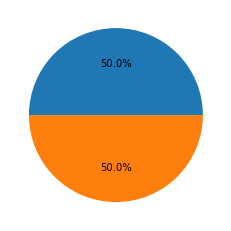

In [42]:
#visualyzing data distribution 
plt.pie(Y_resampeld.value_counts(),autopct="%1.01f%%")
plt.show()

In [43]:
#now spliting the data to train test split 
from sklearn.model_selection import train_test_split


In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,Y_resampeld,test_size=0.3,random_state=1)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(396554, 30)
(169952, 30)
(396554,)
(169952,)


In [52]:
#creating a function of repeating codes 
def create_model(model):
    #train the model with 70% data
    model.fit(X_train,Y_train)
    #test the model with 30% data 
    Y_pred = model.predict(X_test)
    
    #generate report 
    print(classification_report(Y_pred,Y_test))
    plot_confusion_matrix(model,X_test,Y_test)
    plt.title("Confusion matrix")
    plt.show()
    return model

In [53]:
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix

In [54]:
#mow calling the function using LogisticRegression
from sklearn.linear_model import LogisticRegression

In [55]:
#creatiing the object of class logisticregression 
lr=LogisticRegression(C=100)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     86638
           1       0.96      0.98      0.97     83314

    accuracy                           0.97    169952
   macro avg       0.97      0.97      0.97    169952
weighted avg       0.97      0.97      0.97    169952



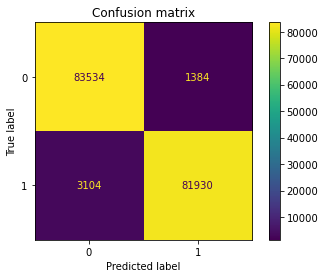

In [56]:
lr=create_model(lr)

In [58]:
#now calling the function using Desicion Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
#creating object of class decisiontreeclassifier
dtc = DecisionTreeClassifier(max_features=8,max_depth=6)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     88111
           1       0.95      0.99      0.97     81841

    accuracy                           0.97    169952
   macro avg       0.97      0.97      0.97    169952
weighted avg       0.97      0.97      0.97    169952



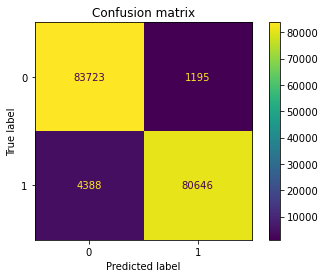

In [61]:
dtc=create_model(dtc)

In [64]:
cols = X.columns
fi = pd.DataFrame(dtc.feature_importances_,index=cols).sort_values(by=0,ascending=False)

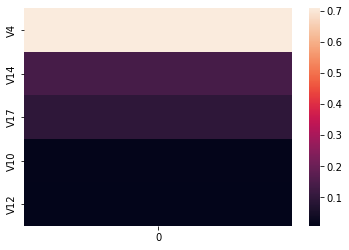

In [70]:
sb.heatmap(fi.head())
plt.show()